In [20]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import numpy as np

In [3]:
nba_pytha_path = "Resources/nba_conf_wise.xlsx"

In [4]:
nba_east = pd.read_excel(nba_pytha_path,"eastern")
nba_west = pd.read_excel(nba_pytha_path,"western")


In [5]:
nba_east["Conf"] = "Eastern"
nba_east.head()

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Philadelphia 76ers,30,13,0.698,—,115.1,109.7,4.92,Eastern
1,Brooklyn Nets,29,14,0.674,1,120.2,115.2,4.42,Eastern
2,Milwaukee Bucks,27,14,0.659,2,119.5,112.5,6.56,Eastern
3,Atlanta Hawks,22,20,0.524,7.5,112.6,110.5,1.73,Eastern
4,Miami Heat,22,21,0.512,8,106.3,107.6,-1.24,Eastern


In [6]:
nba_west["Conf"] = "Western"
nba_west.head()

,Western Conference,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
0,Utah Jazz,30,11,0.732,—,116.7,108.9,8.39,Western
1,Phoenix Suns,28,13,0.683,2,114.1,107.5,6.40,Western
2,Los Angeles Lakers,28,15,0.651,3,111.5,106.2,4.81,Western
3,Los Angeles Clippers,27,16,0.628,4,114.7,109.3,5.23,Western
4,Denver Nuggets,25,17,0.595,5.5,115.9,110.7,5.27,Western


In [7]:
nba_full = pd.concat([nba_east.rename(columns ={"Eastern Conference":"Team"}),nba_west.rename(columns = {"Western Conference":"Team"})],ignore_index = 1)
nba_full.head()
nba_full.tail()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf
25,New Orleans Pelicans,18,24,0.429,12.5,115.3,115.2,0.25,Western
26,Oklahoma City Thunder,18,24,0.429,12.5,106.2,112.2,-5.55,Western
27,Sacramento Kings,17,25,0.405,13.5,114.5,119.6,-4.56,Western
28,Houston Rockets,11,30,0.268,19,106.9,113.7,-7.57,Western
29,Minnesota Timberwolves,10,32,0.238,20.5,109.5,117.2,-7.00,Western


In [8]:
nba_full["pts_ratio"] = nba_full["PS/G"]/nba_full["PA/G"]
nba_full["win%"]=nba_full["W"]/(nba_full["W"]+nba_full["L"])


In [9]:
min =10
min_exp = 0
for exp in range(100): 
    mad =abs(nba_full["pts_ratio"]**exp/(nba_full["pts_ratio"]**exp+1)-nba_full["win%"]).mean()
    if mad < min:
        min = mad
        min_exp = exp
print(min_exp)
print(min)
nba_full["pred.win%"]= nba_full["pts_ratio"]**min_exp/(nba_full["pts_ratio"]**min_exp+1)
nba_full.head()

12
0.04436723349417944


,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%
0,Philadelphia 76ers,30,13,0.698,—,115.1,109.7,4.92,Eastern,1.049225,0.697674,0.640290
1,Brooklyn Nets,29,14,0.674,1,120.2,115.2,4.42,Eastern,1.043403,0.674419,0.624771
2,Milwaukee Bucks,27,14,0.659,2,119.5,112.5,6.56,Eastern,1.062222,0.658537,0.673566
3,Atlanta Hawks,22,20,0.524,7.5,112.6,110.5,1.73,Eastern,1.019005,0.523810,0.556240
4,Miami Heat,22,21,0.512,8,106.3,107.6,-1.24,Eastern,0.987918,0.511628,0.463598


In [10]:
nba_full["PW"] = (nba_full["pred.win%"]*72).round(0)
nba_full["PL"] = 72 - nba_full["PW"]
nba_full.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,Philadelphia 76ers,30,13,0.698,—,115.1,109.7,4.92,Eastern,1.049225,0.697674,0.640290,46.0,26.0
1,Brooklyn Nets,29,14,0.674,1,120.2,115.2,4.42,Eastern,1.043403,0.674419,0.624771,45.0,27.0
2,Milwaukee Bucks,27,14,0.659,2,119.5,112.5,6.56,Eastern,1.062222,0.658537,0.673566,48.0,24.0
3,Atlanta Hawks,22,20,0.524,7.5,112.6,110.5,1.73,Eastern,1.019005,0.523810,0.556240,40.0,32.0
4,Miami Heat,22,21,0.512,8,106.3,107.6,-1.24,Eastern,0.987918,0.511628,0.463598,33.0,39.0


In [11]:
nba_west_pred_standings = nba_full[nba_full["Conf"]=="Western"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
nba_east_pred_standings = nba_full[nba_full["Conf"]=="Eastern"].sort_values(['PW'],ascending = 0).reset_index(drop=1)
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
nba_west_pred_standings.insert(0,"seed",seeds)
nba_east_pred_standings.insert(0,"seed",seeds)

In [12]:
nba_west_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,1,Utah Jazz,30,11,0.732,—,116.7,108.9,8.39,Western,1.071625,0.731707,0.696380,50.0,22.0
1,2,Phoenix Suns,28,13,0.683,2,114.1,107.5,6.40,Western,1.061395,0.682927,0.671508,48.0,24.0
2,3,Los Angeles Lakers,28,15,0.651,3,111.5,106.2,4.81,Western,1.049906,0.651163,0.642081,46.0,26.0
3,4,Los Angeles Clippers,27,16,0.628,4,114.7,109.3,5.23,Western,1.049405,0.627907,0.640764,46.0,26.0
4,5,Denver Nuggets,25,17,0.595,5.5,115.9,110.7,5.27,Western,1.046974,0.595238,0.634332,46.0,26.0
5,6,Dallas Mavericks,22,19,0.537,8,112.1,111.1,1.80,Western,1.009001,0.536585,0.526856,38.0,34.0
6,7,Memphis Grizzlies,19,20,0.487,10,110.9,110.6,0.41,Western,1.002712,0.487179,0.508126,37.0,35.0
7,8,San Antonio Spurs,22,17,0.564,7,110.3,110.4,-0.78,Western,0.999094,0.564103,0.497281,36.0,36.0
8,9,Golden State Warriors,22,21,0.512,9,112.9,113.1,0.30,Western,0.998232,0.511628,0.494690,36.0,36.0
9,10,New Orleans Pelicans,18,24,0.429,12.5,115.3,115.2,0.25,Western,1.000868,0.428571,0.502603,36.0,36.0


In [13]:
nba_east_pred_standings

,seed,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Conf,pts_ratio,win%,pred.win%,PW,PL
0,1,Milwaukee Bucks,27,14,0.659,2,119.5,112.5,6.56,Eastern,1.062222,0.658537,0.673566,48.0,24.0
1,2,Philadelphia 76ers,30,13,0.698,—,115.1,109.7,4.92,Eastern,1.049225,0.697674,0.640290,46.0,26.0
2,3,Brooklyn Nets,29,14,0.674,1,120.2,115.2,4.42,Eastern,1.043403,0.674419,0.624771,45.0,27.0
3,4,Atlanta Hawks,22,20,0.524,7.5,112.6,110.5,1.73,Eastern,1.019005,0.523810,0.556240,40.0,32.0
4,5,Boston Celtics,21,21,0.500,8.5,111.7,110.8,1.08,Eastern,1.008123,0.500000,0.524251,38.0,34.0
5,6,Indiana Pacers,19,22,0.463,10,113.1,112.6,1.02,Eastern,1.004440,0.463415,0.513289,37.0,35.0
6,7,New York Knicks,21,22,0.488,9,104.7,104.8,-0.63,Eastern,0.999046,0.488372,0.497136,36.0,36.0
7,8,Chicago Bulls,19,22,0.463,10,114.0,113.8,-0.36,Eastern,1.001757,0.463415,0.505268,36.0,36.0
8,9,Toronto Raptors,17,25,0.405,12.5,112.3,112.3,-0.24,Eastern,1.000000,0.404762,0.500000,36.0,36.0
9,10,Miami Heat,22,21,0.512,8,106.3,107.6,-1.24,Eastern,0.987918,0.511628,0.463598,33.0,39.0


<IPython.core.display.Javascript object>


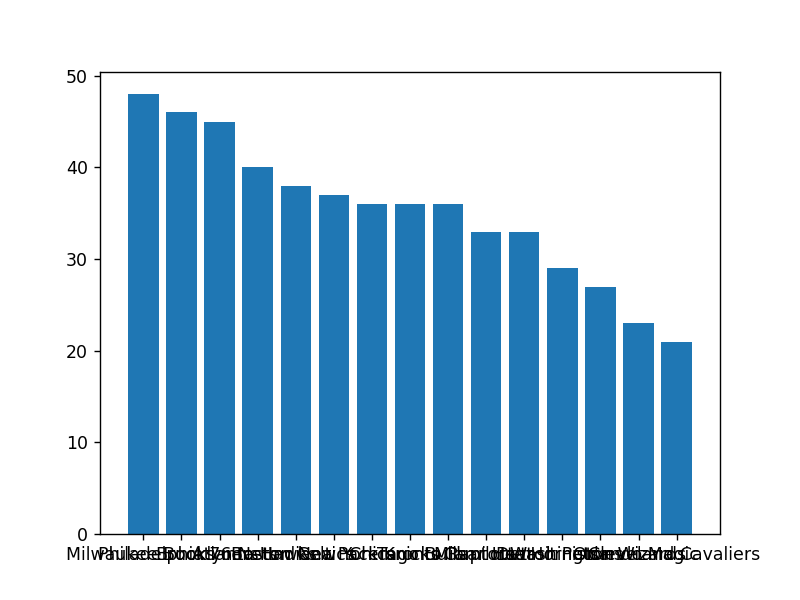

<BarContainer object of 15 artists>

In [15]:
plt.bar(nba_east_pred_standings["Team"],nba_east_pred_standings["PW"])

<IPython.core.display.Javascript object>


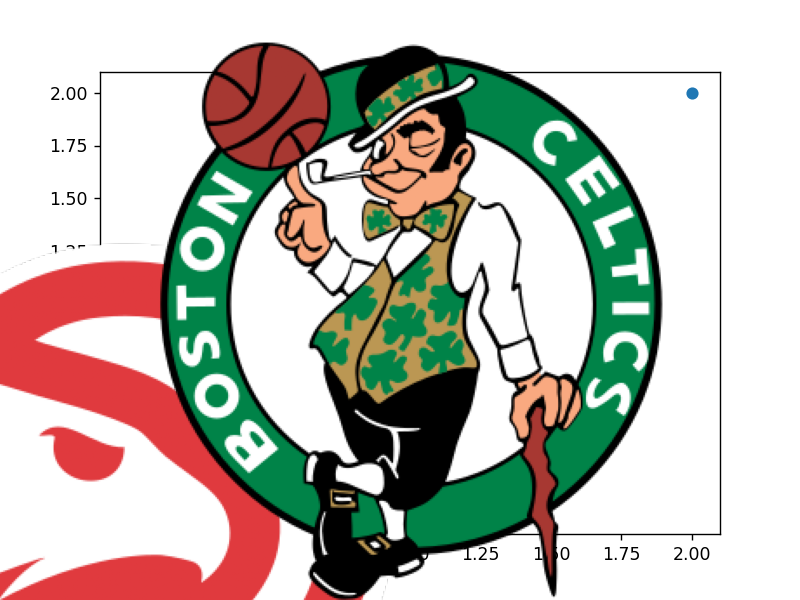

In [18]:
def getImage(path):
    return OffsetImage(plt.imread(path))

paths = [
    '../images/hawks.png',
    '../images/celtics.png']

x = [0,1,2]
y = [0,1,2]

fig, ax = plt.subplots()
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


<IPython.core.display.Javascript object>


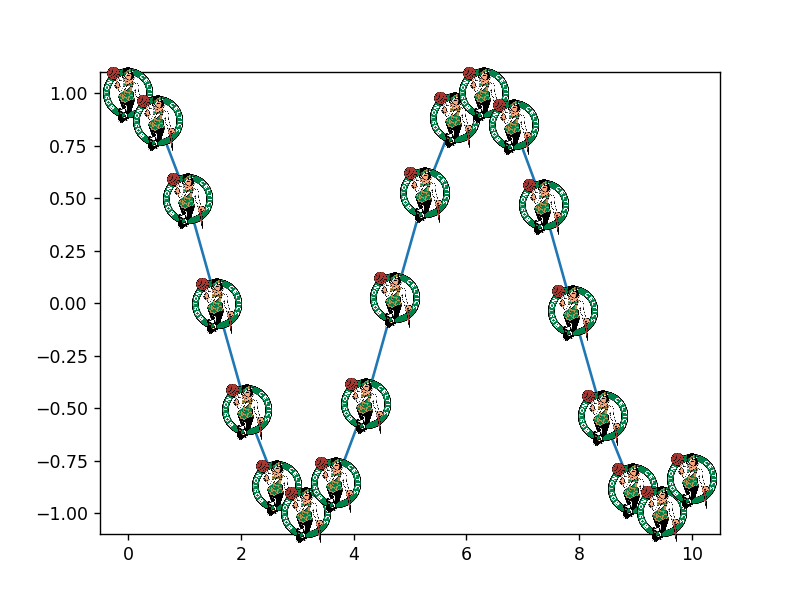

In [26]:
def main():
    x = np.linspace(0, 10, 20)
    y = np.cos(x)
    image_path = []
    team_name =['celtics',
 'nets',
 'knicks',
 'sixers',
 'raptors',
 'bulls',
 'cavaliers',
 'pistons',
 'pacers',
 'bucks',
 'hawks',
 'hornets',
 'heat',
 'magic',
 'wizards',
 'nuggets',
 'timberwolves',
 'thunder',
 'blazers',
 'jazz',
 'warriors',
 'clippers',
 'lakers',
 'suns',
 'kings',
 'mavericks',
 'rockets',
 'grizzlies',
 'pelicans',
 'spurs']
    for n in team_name:
        image_path.append('../images/'+n+'.png')
    fig, ax = plt.subplots()
    imscatter(x, y, image_path[0], zoom=0.1, ax=ax)
    ax.plot(x, y)
    plt.show()

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main()